In [1]:
#fix for scipy version 1.0.0, if using another version or new scikit-learn, could be removed
from scipy.sparse.csgraph import laplacian as csgraph_laplacian

## Here we import the important modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## We create a dataset of 2 circles, inner circle and outer circle

In [3]:
from sklearn.datasets import make_circles

n_samples = 200
X, y = make_circles(n_samples=n_samples, shuffle=False)
outer, inner = 0, 1
labels = -np.ones(n_samples)
labels[0] = outer
labels[-100] = inner

from sklearn.datasets import make_circles

n_samples = 200
Xt, yt = make_circles(n_samples=n_samples, shuffle=False)
outert, innert = 1, 0
labelst = -np.ones(n_samples)
labelst[-100] = outer
labelst[0] = inner

Text(0.5,1,'Raw data (2 classes=outer and inner)')

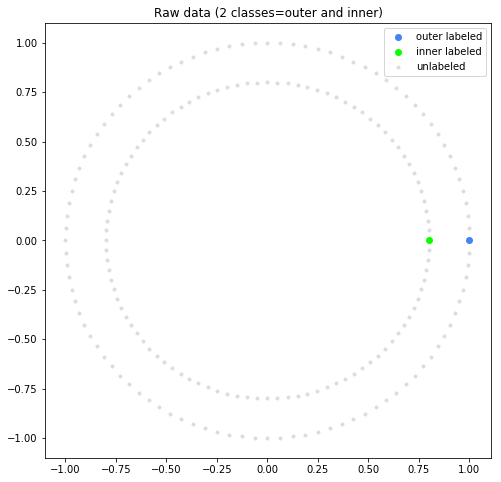

In [23]:
plt.figure(figsize=(8, 8))
plt.scatter(X[labels == outer, 0], X[labels == outer, 1], color='#4286f4',
            marker='o', lw=0, label="outer labeled", s=50)
plt.scatter(X[labels == inner, 0], X[labels == inner, 1], color='#0cff00',
            marker='o', lw=0, label='inner labeled', s=50)
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], color='#dddddd',
            marker='.', label='unlabeled')
plt.legend(scatterpoints=1, shadow=False, loc='upper right')
plt.title("Raw data (2 classes=outer and inner)")

## Create a machine learning model and train it on the original dataset

In [5]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 1)

X_orig = X[labels != -1]
labels_orig = labels[labels != -1]

clf.fit(X_orig, labels_orig)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Text(0.5,1,'Raw data (2 classes=outer and inner)')

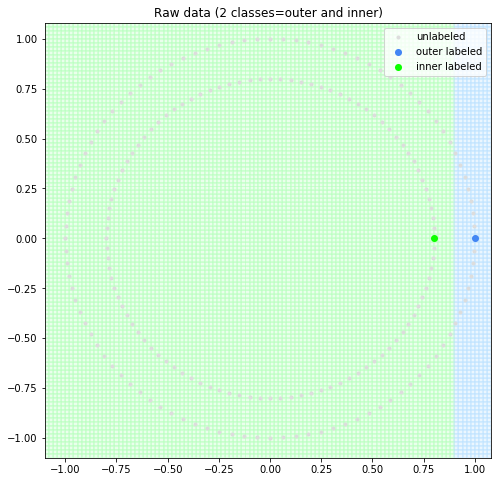

In [6]:
plt.figure(figsize=(8, 8))

from matplotlib.colors import ListedColormap
h = .02
cmap_light = ListedColormap(['#bfe3ff', '#baffc1'])
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha = 0.3, edgecolors = 'face')

plt.scatter(X[labels == -1, 0], X[labels == -1, 1], color='#dddddd',
            marker='.', label='unlabeled')
plt.scatter(X[labels == outer, 0], X[labels == outer, 1], color='#4286f4',
            marker='o', lw=0, label="outer labeled", s=50)
plt.scatter(X[labels == inner, 0], X[labels == inner, 1], color='#0cff00',
            marker='o', lw=0, label='inner labeled', s=50)
plt.legend(scatterpoints=1, shadow=False, loc='upper right')
plt.title("Raw data (2 classes=outer and inner)")

##  <span style="color:red"> We create our semi-supervised model label_prop <span>
<hr>
###  <span style="color:red"> ------------------------------------------------------------------------------- <span>

In [7]:
from sklearn.semi_supervised import label_propagation
label_prop = label_propagation.LabelSpreading(kernel='knn', alpha=0.8, max_iter=10)

from sklearn.semi_supervised import label_propagation
label_propt = label_propagation.LabelSpreading(kernel='knn', alpha=0.8, max_iter=10)

In [8]:
label_prop.fit(X, labels)

label_propt.fit(Xt, labelst)

/Users/ltencer/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:288: ConvergenceWarning: max_iter=10 was reached without convergence.
  category=ConvergenceWarning
/Users/ltencer/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


LabelSpreading(alpha=0.8, gamma=20, kernel='knn', max_iter=10, n_jobs=1,
        n_neighbors=7, tol=0.001)

###  <span style="color:red"> ------------------------------------------------------------------------------- <span>

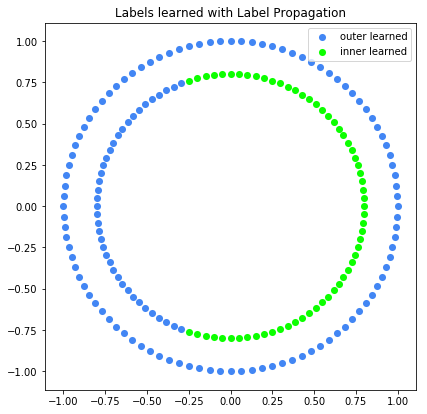

In [9]:
output_labels = label_prop.transduction_
plt.figure(figsize=(6, 6))
output_label_array = np.asarray(output_labels)
outer_numbers = np.where(output_label_array == outer)[0]
inner_numbers = np.where(output_label_array == inner)[0]
plt.scatter(X[outer_numbers, 0], X[outer_numbers, 1], color='#4286f4',
            marker='o', lw=0, s=50, label="outer learned")
plt.scatter(X[inner_numbers, 0], X[inner_numbers, 1], color='#0cff00',
            marker='o', lw=0, s=50, label="inner learned")
plt.legend(scatterpoints=1, shadow=False, loc='upper right')
plt.title("Labels learned with Label Propagation")

plt.subplots_adjust(left=0.07, bottom=0.07, right=0.93, top=0.92)
plt.show()


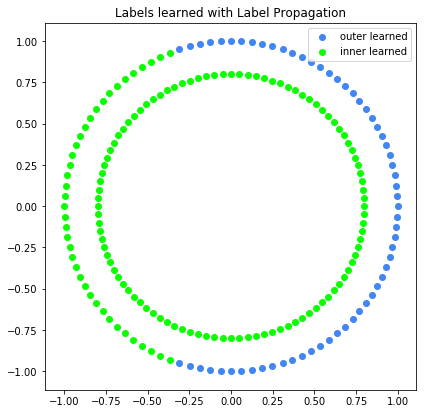

In [10]:
output_labelst = label_propt.transduction_
plt.figure(figsize=(6, 6))
output_label_arrayt = np.asarray(output_labelst)
outer_numberst = np.where(output_label_arrayt == outert)[0]
inner_numberst = np.where(output_label_arrayt == innert)[0]
plt.scatter(Xt[outer_numberst, 0], X[outer_numberst, 1], color='#4286f4',
            marker='o', lw=0, s=50, label="outer learned")
plt.scatter(Xt[inner_numberst, 0], X[inner_numberst, 1], color='#0cff00',
            marker='o', lw=0, s=50, label="inner learned")
plt.legend(scatterpoints=1, shadow=False, loc='upper right')
plt.title("Labels learned with Label Propagation")

plt.subplots_adjust(left=0.07, bottom=0.07, right=0.93, top=0.92)
plt.show()


In [11]:
output_labelst

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
X1 = X[output_labels == 1]
X2 = Xt[output_labelst == 1]

In [13]:
X1

array([[ 8.00000000e-01,  0.00000000e+00],
       [ 7.98421383e-01,  5.02324156e-02],
       [ 7.93691761e-01,  1.00266587e-01],
       [ 7.85829801e-01,  1.49905052e-01],
       [ 7.74866529e-01,  1.98951910e-01],
       [ 7.60845213e-01,  2.47213595e-01],
       [ 7.43821189e-01,  2.94499642e-01],
       [ 7.23861642e-01,  3.40623433e-01],
       [ 7.01045344e-01,  3.85402939e-01],
       [ 6.75462340e-01,  4.28661436e-01],
       [ 6.47213595e-01,  4.70228202e-01],
       [ 6.16410594e-01,  5.09939192e-01],
       [ 5.83174902e-01,  5.47637685e-01],
       [ 5.47637685e-01,  5.83174902e-01],
       [ 5.09939192e-01,  6.16410594e-01],
       [ 4.70228202e-01,  6.47213595e-01],
       [ 4.28661436e-01,  6.75462340e-01],
       [ 3.85402939e-01,  7.01045344e-01],
       [ 3.40623433e-01,  7.23861642e-01],
       [ 2.94499642e-01,  7.43821189e-01],
       [ 2.47213595e-01,  7.60845213e-01],
       [ 1.98951910e-01,  7.74866529e-01],
       [ 1.49905052e-01,  7.85829801e-01],
       [ 1.

In [14]:
XX = np.append(X1,X2,axis=0)

In [15]:
ol1 = output_labels[output_labels == 1]
ol1[ol1 == 1] = 0
ol2 = output_labelst[output_labelst == 1]

In [16]:
ol = np.append(ol1,ol2,axis=0)

In [17]:
ol

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

## Train the original classifier clf on the new dataset

In [18]:
clf.fit(XX, ol)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

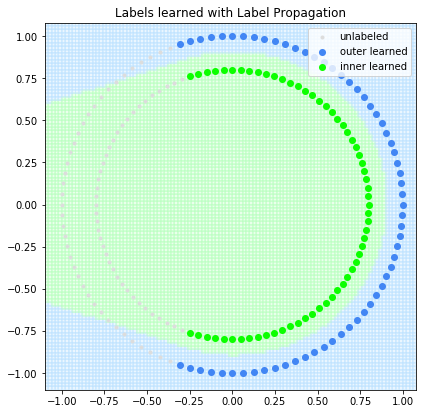

In [19]:
output_labels = label_prop.transduction_
plt.figure(figsize=(6, 6))

plt.figure(figsize=(6, 6))

from matplotlib.colors import ListedColormap
h = .02
cmap_light = ListedColormap(['#bfe3ff', '#baffc1'])
cmap_light = ListedColormap(['#baffc1', '#bfe3ff'])
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha = 0.3, edgecolors = 'face')

output_label_array = np.asarray(output_labels)
outer_numbers = np.where(output_label_array == outer)[0]
inner_numbers = np.where(output_label_array == inner)[0]
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], color='#dddddd',
            marker='.', label='unlabeled')
plt.scatter(Xt[outer_numberst, 0], X[outer_numberst, 1], color='#4286f4',
            marker='o', lw=0, s=50, label="outer learned")
plt.scatter(X[inner_numbers, 0], X[inner_numbers, 1], color='#0cff00',
            marker='o', lw=0, s=50, label="inner learned")
plt.legend(scatterpoints=1, shadow=False, loc='upper right')
plt.title("Labels learned with Label Propagation")

plt.subplots_adjust(left=0.07, bottom=0.07, right=0.93, top=0.92)
plt.show()

In [20]:
def plot_somthing_nice(n_iter):
    
    from sklearn.semi_supervised import label_propagation
    label_prop = label_propagation.LabelSpreading(kernel='knn', alpha=0.8, max_iter=n_iter)

    from sklearn.semi_supervised import label_propagation
    label_propt = label_propagation.LabelSpreading(kernel='knn', alpha=0.8, max_iter=n_iter)
    
    label_prop.fit(X, labels)

    label_propt.fit(Xt, labelst)
    
    output_labels = label_prop.transduction_
    output_labelst = label_propt.transduction_
    
    X1 = X[output_labels == 1]
    X2 = Xt[output_labelst == 1]
    
    XX = np.append(X1,X2,axis=0)
    
    ol1 = output_labels[output_labels == 1]
    ol1[ol1 == 1] = 0
    ol2 = output_labelst[output_labelst == 1]
    ol = np.append(ol1,ol2,axis=0)
    
    clf.fit(XX, ol)
    
    
    output_labels = label_prop.transduction_
    plt.figure(figsize=(8, 8))

#     plt.figure(figsize=(6, 6))

    from matplotlib.colors import ListedColormap
    h = .02
    cmap_light = ListedColormap(['#bfe3ff', '#baffc1'])
    cmap_light = ListedColormap(['#baffc1', '#bfe3ff'])
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha = 0.3, edgecolors = 'face')

    output_label_array = np.asarray(output_labels)
    outer_numbers = np.where(output_label_array == outer)[0]
    inner_numbers = np.where(output_label_array == inner)[0]
    plt.scatter(X[labels == -1, 0], X[labels == -1, 1], color='#dddddd',
                marker='.', label='unlabeled')
    plt.scatter(XX[ol == 1, 0], XX[ol == 1, 1], color='#4286f4',
                marker='o', lw=0, s=50, label="outer learned")
    plt.scatter(XX[ol == 0, 0], XX[ol == 0, 1], color='#0cff00',
                marker='o', lw=0, s=50, label="inner learned")
    plt.legend(scatterpoints=1, shadow=False, loc='upper right')
    plt.title("Labels learned with Label Propagation")

    plt.subplots_adjust(left=0.07, bottom=0.07, right=0.93, top=0.92)
    plt.show()
    
    

/Users/ltencer/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:288: ConvergenceWarning: max_iter=1 was reached without convergence.
  category=ConvergenceWarning
/Users/ltencer/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


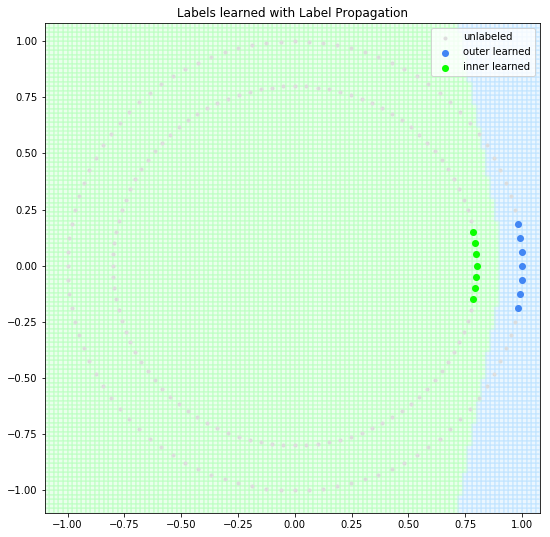

/Users/ltencer/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:288: ConvergenceWarning: max_iter=2 was reached without convergence.
  category=ConvergenceWarning


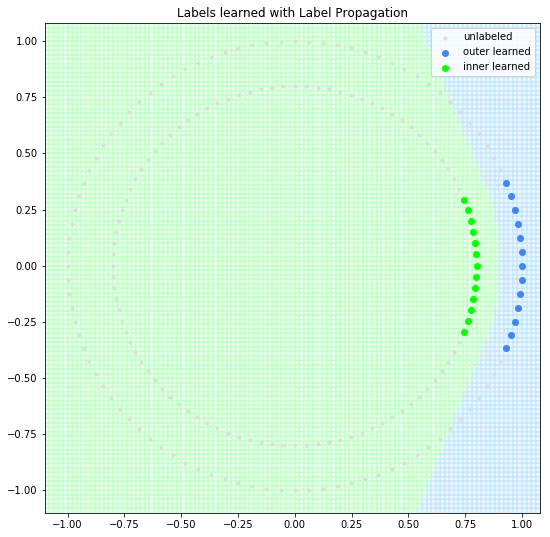

/Users/ltencer/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:288: ConvergenceWarning: max_iter=3 was reached without convergence.
  category=ConvergenceWarning


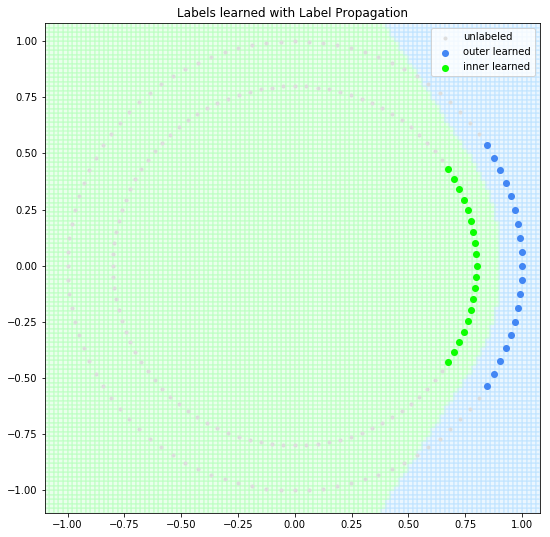

/Users/ltencer/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:288: ConvergenceWarning: max_iter=4 was reached without convergence.
  category=ConvergenceWarning


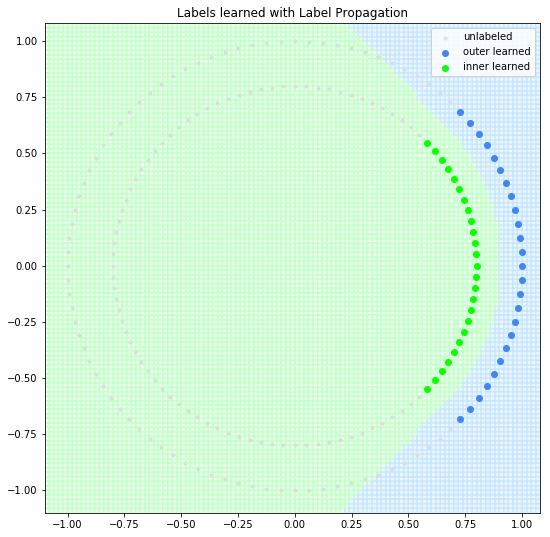

/Users/ltencer/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:288: ConvergenceWarning: max_iter=5 was reached without convergence.
  category=ConvergenceWarning


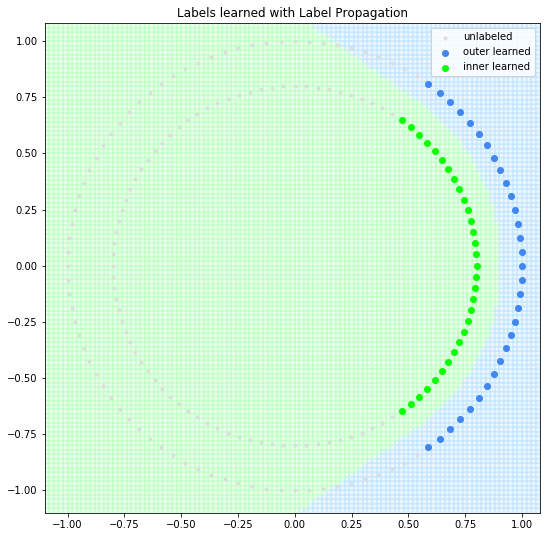

/Users/ltencer/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:288: ConvergenceWarning: max_iter=6 was reached without convergence.
  category=ConvergenceWarning


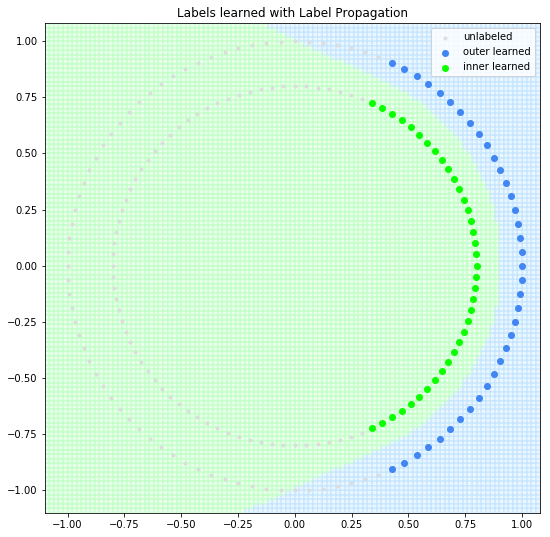

/Users/ltencer/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:288: ConvergenceWarning: max_iter=7 was reached without convergence.
  category=ConvergenceWarning


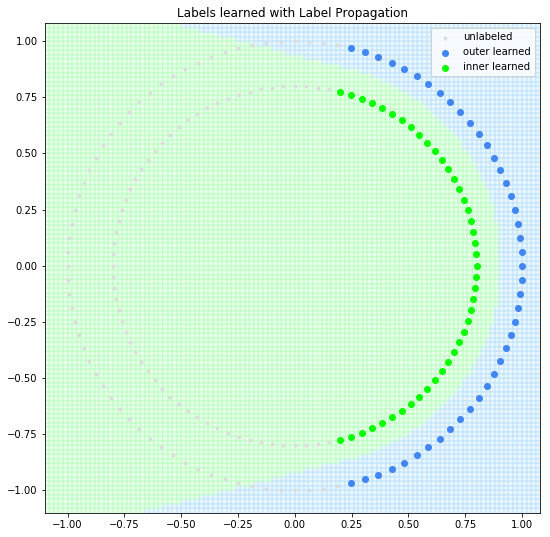

/Users/ltencer/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:288: ConvergenceWarning: max_iter=8 was reached without convergence.
  category=ConvergenceWarning


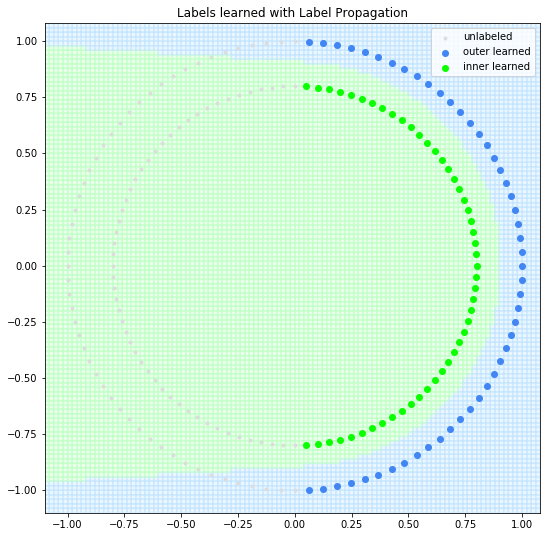

/Users/ltencer/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:288: ConvergenceWarning: max_iter=9 was reached without convergence.
  category=ConvergenceWarning


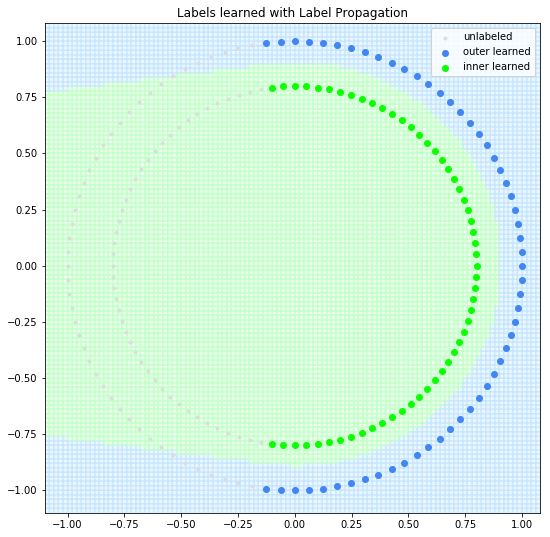

/Users/ltencer/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:288: ConvergenceWarning: max_iter=10 was reached without convergence.
  category=ConvergenceWarning


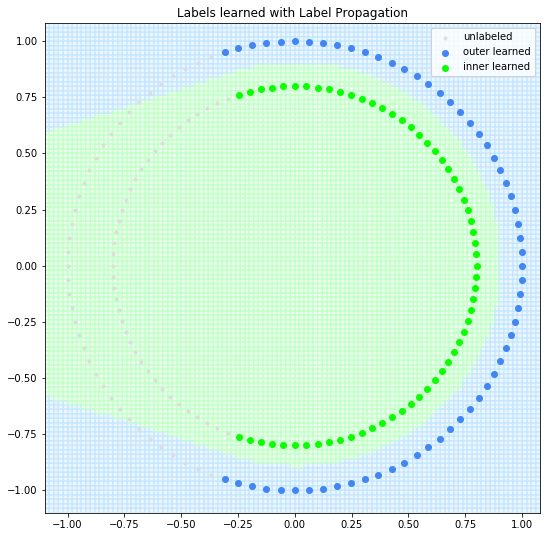

/Users/ltencer/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:288: ConvergenceWarning: max_iter=11 was reached without convergence.
  category=ConvergenceWarning


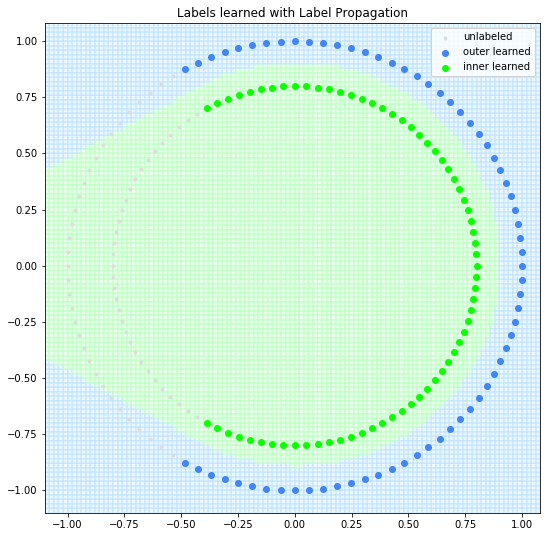

/Users/ltencer/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:288: ConvergenceWarning: max_iter=12 was reached without convergence.
  category=ConvergenceWarning


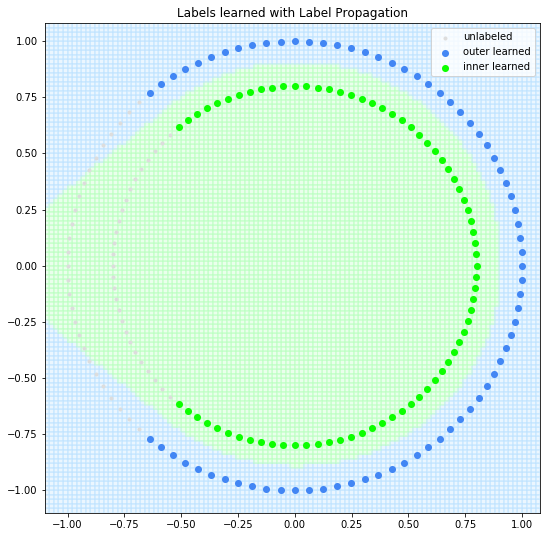

/Users/ltencer/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:288: ConvergenceWarning: max_iter=13 was reached without convergence.
  category=ConvergenceWarning


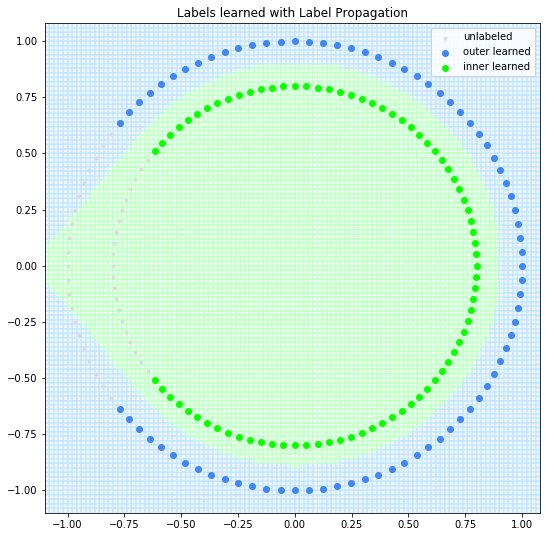

/Users/ltencer/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:288: ConvergenceWarning: max_iter=14 was reached without convergence.
  category=ConvergenceWarning


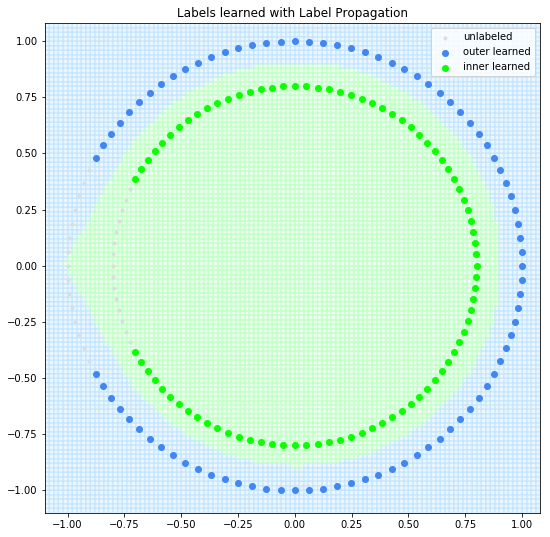

/Users/ltencer/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:288: ConvergenceWarning: max_iter=15 was reached without convergence.
  category=ConvergenceWarning


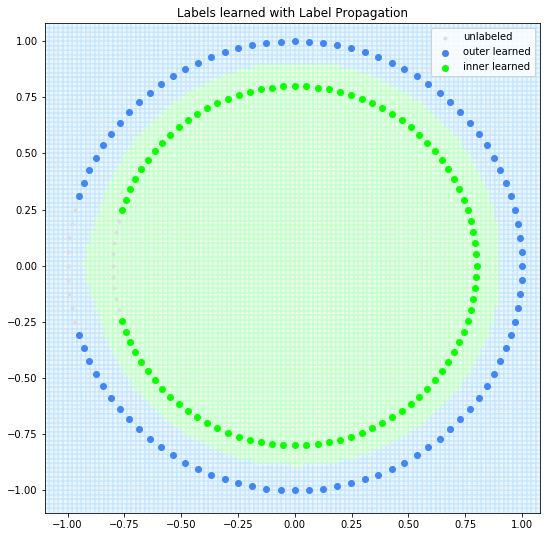

/Users/ltencer/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:288: ConvergenceWarning: max_iter=16 was reached without convergence.
  category=ConvergenceWarning


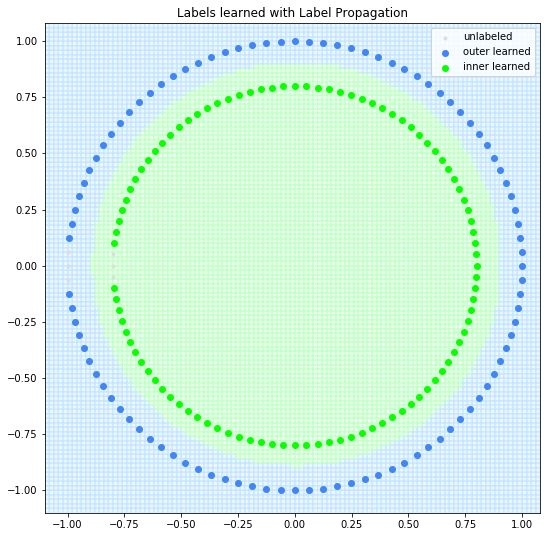

/Users/ltencer/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:288: ConvergenceWarning: max_iter=17 was reached without convergence.
  category=ConvergenceWarning


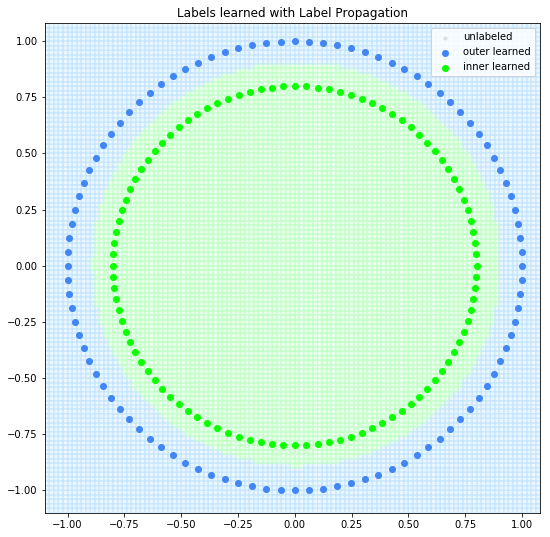

/Users/ltencer/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:288: ConvergenceWarning: max_iter=18 was reached without convergence.
  category=ConvergenceWarning


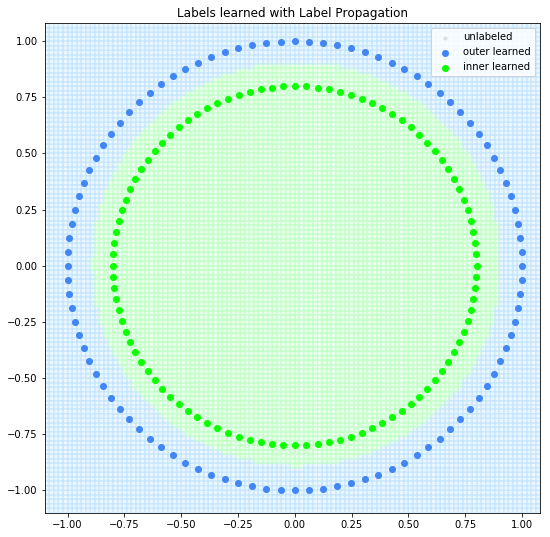

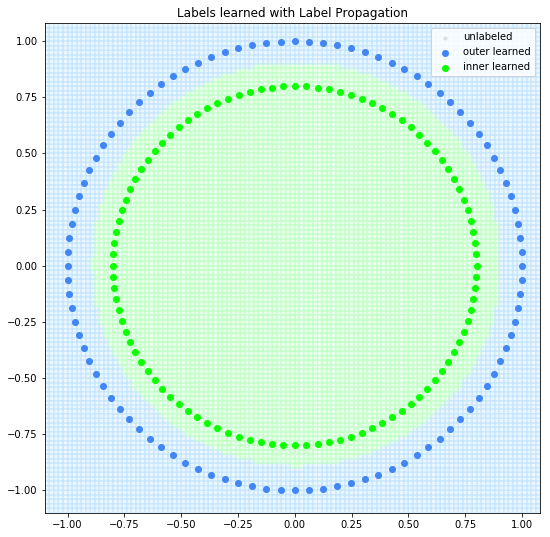

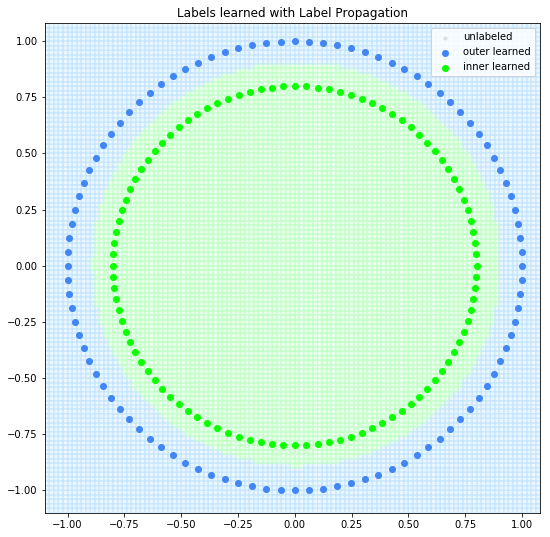

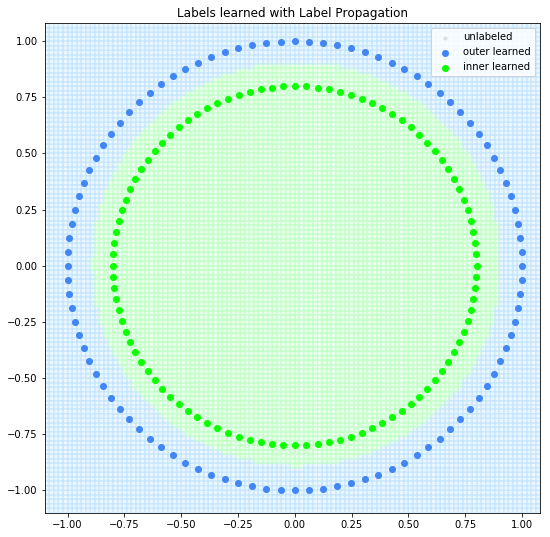

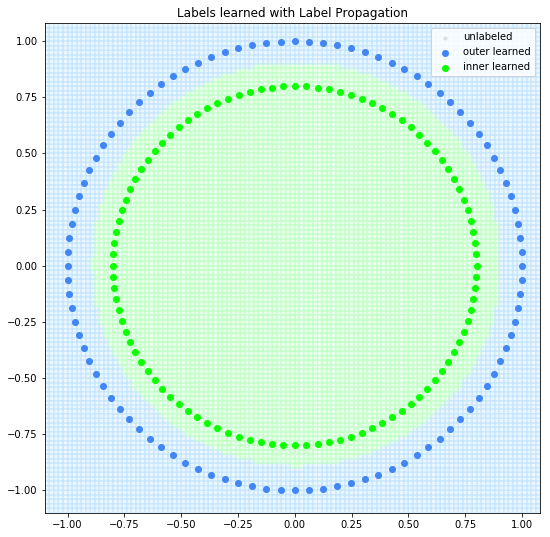

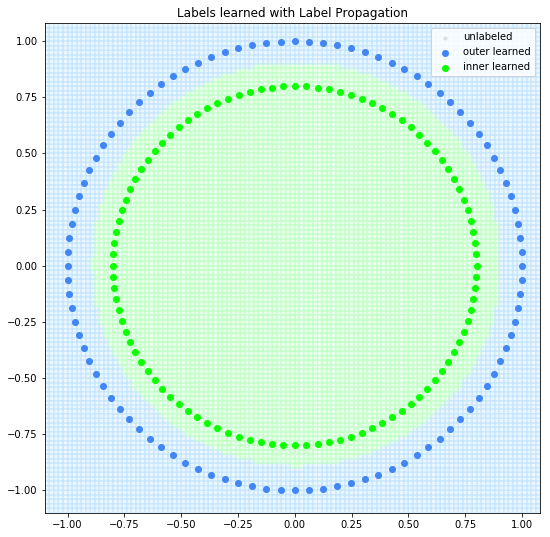

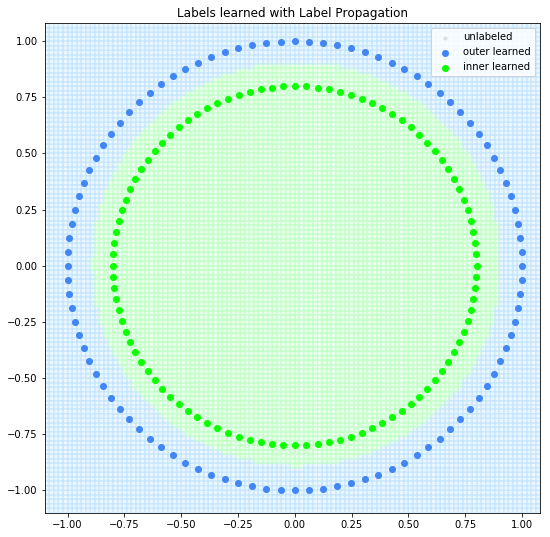

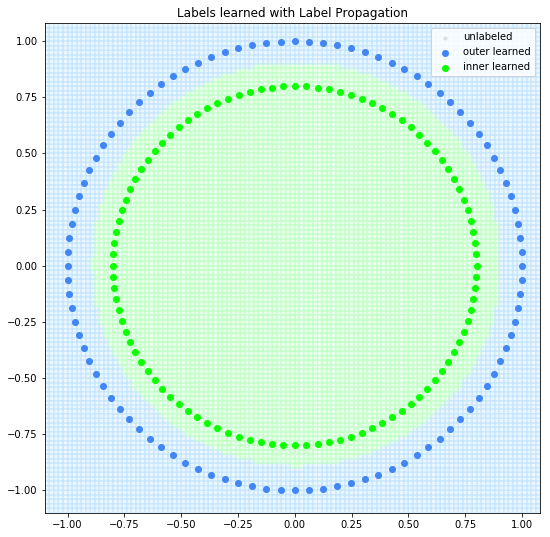

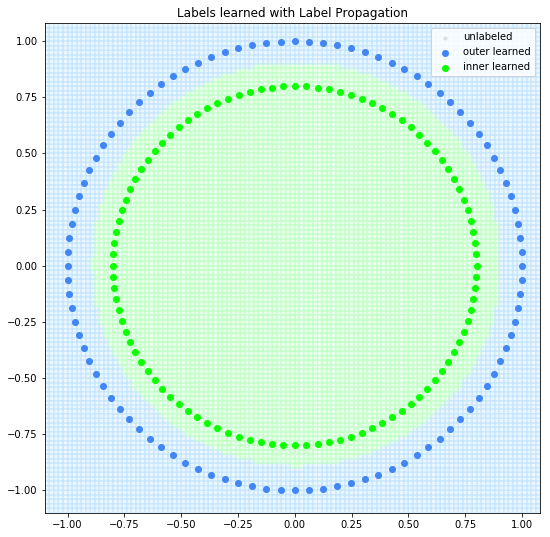

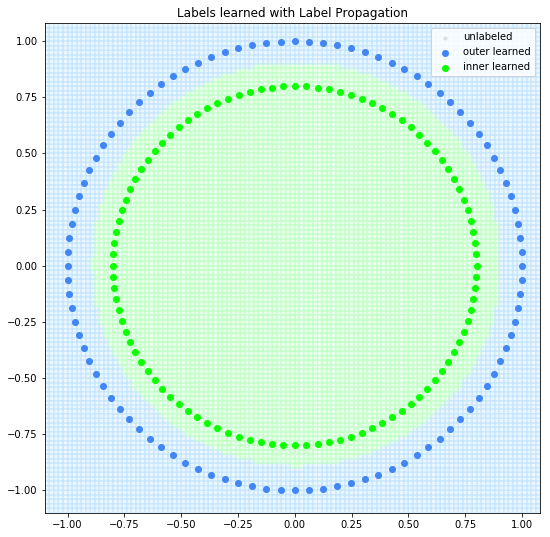

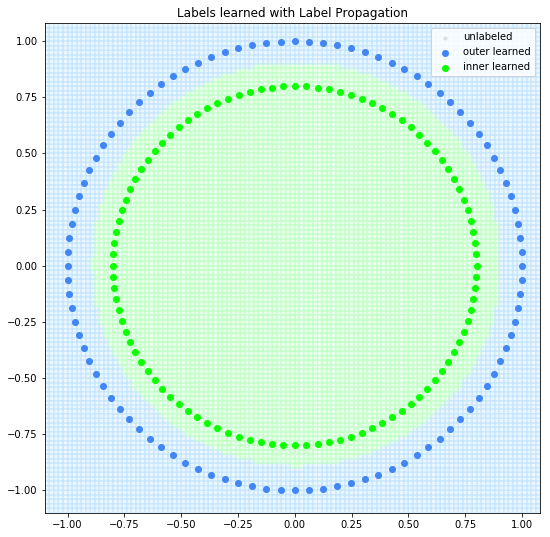

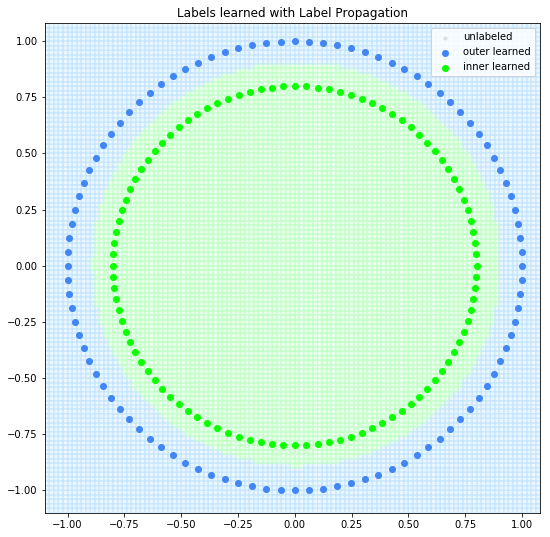

In [21]:
for i in range(1,30):
    plot_somthing_nice(i)